<a href="https://colab.research.google.com/github/Hackley-STEM-Club/PyTorchTutorial/blob/main/PyTorchTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch
import torchvision
from torchvision import transforms, datasets


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [27]:
train = datasets.MNIST("",train=True,download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))


test = datasets.MNIST("",train=False,download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))



In [28]:
trainset = torch.utils.data.DataLoader(train,batch_size = 16,shuffle = True)


testset = torch.utils.data.DataLoader(test,batch_size = 16,shuffle = True)

In [29]:
import torch.nn as nn 
import torch.nn.functional as F

In [51]:
amount_of_number = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
        X, y = data
        amount_of_number[y[0].item()] += 1  
print(amount_of_number)

{0: 398, 1: 385, 2: 377, 3: 407, 4: 389, 5: 345, 6: 358, 7: 389, 8: 342, 9: 360}


In [30]:

class Net(nn.Module):
    def __init__(self):
        super().__init__() # inherit modules from nn.Module
        # images are 28*28,(FC1) fully connected first layer
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 32) #the amount of layers that we make is arbitrary
        self.fc3 = nn.Linear(32, 10)
  


    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  

        return F.log_softmax(x,dim=1)

net = Net().to(device)


In [41]:
import torch.optim as optim
import matplotlib.pyplot as plt


optimizer = optim.Adam(net.parameters(), lr = .001)


# how many times we pass the traindata through the network
EPOCHS = 1


#train the neural network 
for epoch in range(EPOCHS):
  for i, data in enumerate(trainset):
      X, y = data # data stores a tensor of both the image and label

      net.zero_grad()

      output = net(X.view(-1,28*28).to(device))
      loss = F.nll_loss(output,y.to(device)) # compare the output to the label of number 
      loss.backward()
      optimizer.step()

        



In [42]:
correct = 0
total = 0

# testing the neural net without performing gradient descent (changing the parameters)
with torch.no_grad():
    for data in testset:
        X, y = data
        
        output = net(X.view(-1,28*28).to(device))
        #does prediction match target valuewsed
        for idx, i in enumerate(output): 
            if torch.argmax(i) == y[idx].to(device):
                correct +=1
            total += 1

        
    print("Accuracy: ", round(correct/total,3)*100) # print correctness


Accuracy:  96.5


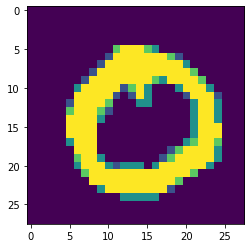

Neural network's guess:  0
Actual:  0


In [50]:
import matplotlib.pyplot as plt 
test_a_number = 13 # value must be from 0-15, as our batch-size was sixteen
plt.imshow(X[test_a_number].view(28,28))
plt.show()

print("Neural network's guess: ", torch.argmax(net(X[test_a_number].view(1,28*28).to(device))).item())
print("Actual: ", y[test_a_number].item())